In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
train_data_path= './data/train.csv'
test_data_path= './data/test.csv'

In [2]:
data_train = pd.read_csv(train_data_path)
data_test = pd.read_csv(test_data_path)



In [3]:
data = data_train.append(data_test)
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)
data.head(5)

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0


In [4]:
data['date'] = data.datetime.apply(lambda x : x.split()[0])
data['hour'] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype('int')
data['year'] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data['weekday'] = data.date.apply(lambda x : datetime.strptime(x, "%Y-%m-%d").weekday())
data['month'] = data.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").month)
data.head(5)

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,date,hour,year,weekday,month
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0,2011-01-01,0,2011,5,1
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0,2011-01-01,1,2011,5,1
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0,2011-01-01,2,2011,5,1
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0,2011-01-01,3,2011,5,1
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0,2011-01-01,4,2011,5,1


In [5]:
pd.DataFrame(data.groupby('windspeed').windspeed.count().reset_index(name="ws_cnt")).head(5)

,windspeed,ws_cnt
0,0.0000,2180
1,6.0032,1425
2,7.0015,1617
3,8.9981,1738
4,11.0014,1695


In [6]:
from sklearn.ensemble import RandomForestRegressor

data_wind_0 = data[data["windspeed"]==0]
data_wind_not_0 = data[data["windspeed"] != 0]
print data_wind_0.shape
print data_wind_not_0.shape


(2180, 17)
(15199, 17)


In [7]:
rf_model_wind = RandomForestRegressor()
wind_columns = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]
rf_model_wind.fit(data_wind_not_0[wind_columns], data_wind_not_0["windspeed"])

wind_0_values= rf_model_wind.predict(X=data_wind_0[wind_columns])
data_wind_0["windspeed"] = wind_0_values 
data = data_wind_not_0.append(data_wind_0)
data.reset_index(inplace=True)
data.drop('index',inplace=True, axis=1)

data.head(5)

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,date,hour,year,weekday,month
0,12.880,0.0,1.0,2011-01-01 05:00:00,0,75,1.0,1,9.84,2,6.0032,0,2011-01-01,5,2011,5,1
1,19.695,12.0,36.0,2011-01-01 10:00:00,0,76,24.0,1,15.58,1,16.9979,0,2011-01-01,10,2011,5,1
2,16.665,26.0,56.0,2011-01-01 11:00:00,0,81,30.0,1,14.76,1,19.0012,0,2011-01-01,11,2011,5,1
3,21.210,29.0,84.0,2011-01-01 12:00:00,0,77,55.0,1,17.22,1,19.0012,0,2011-01-01,12,2011,5,1
4,22.725,47.0,94.0,2011-01-01 13:00:00,0,72,47.0,1,18.86,2,19.9995,0,2011-01-01,13,2011,5,1


In [8]:
data[data["windspeed"]==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 17 columns):
atemp         0 non-null float64
casual        0 non-null float64
count         0 non-null float64
datetime      0 non-null object
holiday       0 non-null int64
humidity      0 non-null int64
registered    0 non-null float64
season        0 non-null int64
temp          0 non-null float64
weather       0 non-null int64
windspeed     0 non-null float64
workingday    0 non-null int64
date          0 non-null object
hour          0 non-null int64
year          0 non-null object
weekday       0 non-null int64
month         0 non-null int64
dtypes: float64(6), int64(8), object(3)
memory usage: 0.0+ bytes


In [9]:
categorical_feature_names = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numerical_feature_names = ["temp","humidity","windspeed","atemp"]
drop_features = ['casual',"count","datetime","date","registered"]

In [10]:
for var in categorical_feature_names:
    data[var] = data[var].astype("category")

In [11]:
data_train = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
data_test = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetime_col = data_test["datetime"]
y_labels = data_train["count"]
y_label_registered = data_train["registered"]
y_label_casual = data_train["casual"]

print data_train.shape
print data_test.shape

(10886, 17)
(6493, 17)


In [12]:
data_train = data_train.drop(drop_features, axis=1)
data_test = data_test.drop(drop_features, axis=1)

In [13]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [14]:
y_labels_wo_outlier = y_labels[np.abs(y_labels-y_labels.mean()) <= (3*y_labels.std())]

print y_labels.std()
print y_labels.max()
print y_labels.skew()
print np.log(y_labels).skew()
print np.log1p(y_labels).skew()
print '-------------------'
print y_labels_wo_outlier.std()
print y_labels_wo_outlier.max()
print y_labels_wo_outlier.skew()
print np.log(y_labels_wo_outlier).skew()
print np.log1p(y_labels_wo_outlier).skew()

181.14445383
977.0
1.24206621172
-0.971227722787
-0.851411632174
-------------------
166.681428836
734.0
1.02834360636
-0.990164921243
-0.870569788223


In [18]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

Linear regression

In [19]:
l_model = LinearRegression()
y_labels_log = np.log1p(y_labels)
l_model.fit(X=data_train, y=y_labels_log)
preds = l_model.predict(X =data_train)
print "RMSLE Value For Linear Regression: ",rmsle(np.exp(y_labels_log),np.exp(preds),False)

RMSLE Value For Linear Regression:  0.97796147008


**Regularization Model - Ridge**

{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.97796145503


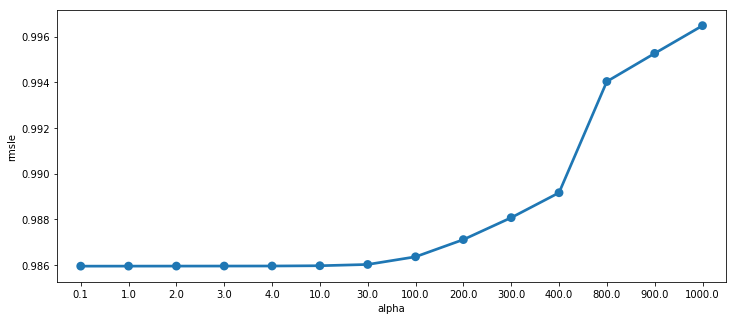

In [24]:
ridge_m_ = Ridge()
ridge_params_ = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV(ridge_m_,
                            ridge_params_,
                            scoring = rmsle_scorer,
                            cv=5)

y_labels_log = np.log1p(y_labels)
grid_ridge_m.fit(data_train, y_labels_log)
preds = grid_ridge_m.predict(X=data_train)

print grid_ridge_m.best_params_
print "RMSLE Value For Ridge Regression: ", rmsle(np.exp(y_labels_log), np.exp(preds),False)


fig, ax = plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.grid_scores_)
df['alpha'] = df['parameters'].apply(lambda x:x['alpha'])
df['rmsle'] = df['mean_validation_score'].apply(lambda x: -x)
sns.pointplot(data=df, x="alpha", y="rmsle", ax=ax)

**Regularization Model - Lasso**

{'alpha': 0.0050000000000000001, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.97796145503


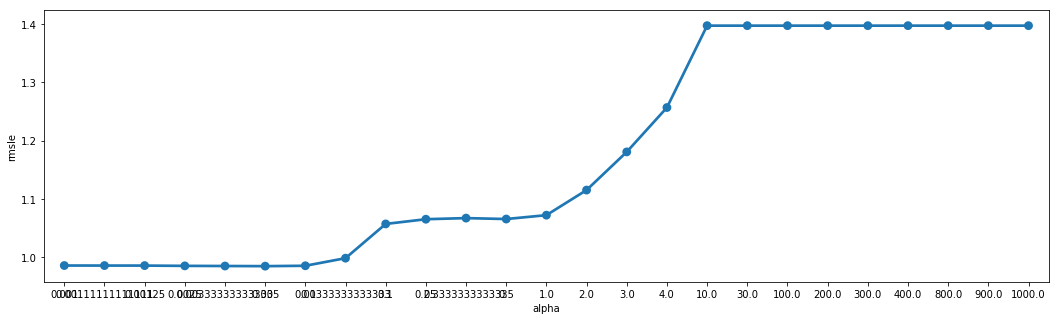

In [34]:
lasso_m_ = Lasso()
alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
new_alpha = np.concatenate((alpha, np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])), axis=0)
lasso_param_ = { 'max_iter':[3000], 'alpha':new_alpha}

grid_lasso_m = GridSearchCV( lasso_m_, lasso_param_, scoring = rmsle_scorer, cv=5)

y_labels_log = np.log1p(y_labels)
grid_lasso_m.fit(data_train, y_labels_log)
preds = grid_lasso_m.predict(X=data_train)

print grid_lasso_m.best_params_
print "RMSLE Value For Lasso Regression: ",rmsle(np.exp(y_labels_log),np.exp(preds),False)

fig,ax= plt.subplots()
fig.set_size_inches(18,5)
df = pd.DataFrame(grid_lasso_m.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x)
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)



可以看到Lasso在10之後就是一個放棄fitting的狀態

**Ensemble Models - Random Forest**

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=1000)
y_labels_log = np.log1p(y_labels)
rf_model.fit(data_train, y_labels_log)
preds = rf_model.predict(X=data_train)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(y_labels_log),np.exp(preds),False))


('RMSLE Value For Random Forest: ', 0.10031550243021067)


In [86]:
from sklearn.model_selection import RandomizedSearchCV
rfm = RandomForestRegressor()
rf_params_ = {'n_estimators':[10,50, 100,150, 200, 250, 300, 350, 400, 450]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
random_rfm = RandomizedSearchCV(rfm,rf_params_,scoring = rmsle_scorer,cv=5)
y_labels_log = np.log1p(y_labels)
random_rfm.fit(data_train, y_labels_log)
preds = random_rfm.predict(X=data_train)
print random_rfm.best_params_
print "RMSLE Value For RF Regression: ",rmsle(np.exp(y_labels_log),np.exp(preds),False)


{'n_estimators': 450}
RMSLE Value For RF Regression:  0.101595941979


**Ensemble Model - Gradient Boost**

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=80000, alpha=0.001)
y_label_log = np.log1p(y_labels)
gbm.fit(data_train, y_labels_log)
preds = gbm.predict(X=data_train)
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(y_label_log),np.exp(preds),False))

('RMSLE Value For Gradient Boost: ', 0.084167140026240594)


1.24206621172
<class 'pandas.core.series.Series'>


-0.8150341882928468

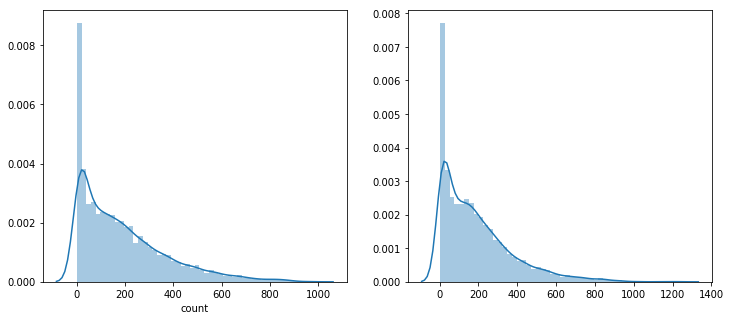

In [71]:
preds_test = gbm.predict(X=data_test)
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_labels,ax=ax1, bins=50)
sns.distplot(np.exp(preds_test), ax = ax2, bins=50)

print y_labels.skew()
print type(y_labels)
pd.DataFrame(preds_test).rename(columns={0:'pred'}).pred.skew()
# preds_test.tolist.skew()
# print np.exp(preds_test).skew

In [79]:
datetimecol = pd.read_csv(test_data_path)["datetime"]
submission = pd.DataFrame({
        "datetime":datetimecol,
        "count":[max(0,x) for x in np.exp(preds_test)]
})
submission.to_csv('bike_predictions_gbm_separate_without_fe.csv', index=False)
res = pd.read_csv('bike_predictions_gbm_separate_without_fe.csv')
res.head(5)

,count,datetime
0,15.082167,2011-01-20 00:00:00
1,6.407384,2011-01-20 01:00:00
2,4.439539,2011-01-20 02:00:00
3,4.365851,2011-01-20 03:00:00
4,2.042998,2011-01-20 04:00:00
